# Normalization and Standardization of data

## 1) Importing Libraries
 

In [ ]:
# pandas and numpy libraries
import pandas as pd
import numpy as np

#sckit learn 
from sklearn.impute import SimpleImputer

#matplot lib and seaborn imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
# install Bokeh(visualization tool)
!pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

## 2) Import Dataset

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data',on_bad_lines='skip',header = None)
data

0   1   2   3      4       5      6     7      8      9     10 11 12
0     11   0  71   0  0.260       9  4.600    14      1      1  name  1  0
1     19   0  72   0  0.380       6  4.100    14  1.700  0.588  name  1  0
2     16   0  55   0  0.260       4  3.420    14      1      1  name  1  0
3     57   0  60   0  0.253  12.062  4.603    16  1.450  0.788  name  1  0
4     19   1  57   0  0.160      22  5.750    18  2.250  0.571  name  1  0
..   ...  ..  ..  ..    ...     ...    ...   ...    ...    ...   ... .. ..
126  7.5   1  64   0   0.24    12.9   4.72    12      1  0.857  name  ?  ?
127   41   0  64   0   0.28    5.40   5.47    11   1.10  0.714  name  ?  ?
128   36   0  69   0   0.20    7.00   5.05  14.5   1.21  0.857  name  ?  ?
129   22   0  57   0   0.14    16.1   4.36    15   1.36  0.786  name  ?  ?
130   20   0  62   0   0.15       0   4.51  15.5  1.409  0.786  name  ?  ?

[131 rows x 13 columns]

In [ ]:
# Assign column names to the data
cols = ['survival','still-alive','age-at-heart-attack','pericardial-effusion','fractional-shortening','epss','lvdd','wall-motion-score','wall-motion-index','mult','names','group','alive-at-1'];
data.columns = cols
data

survival  still-alive age-at-heart-attack  pericardial-effusion  \
0         11            0                  71                     0   
1         19            0                  72                     0   
2         16            0                  55                     0   
3         57            0                  60                     0   
4         19            1                  57                     0   
..       ...          ...                 ...                   ...   
126      7.5            1                  64                     0   
127       41            0                  64                     0   
128       36            0                  69                     0   
129       22            0                  57                     0   
130       20            0                  62                     0   

    fractional-shortening    epss   lvdd wall-motion-score wall-motion-index  \
0                   0.260       9  4.600                14                 1   
1                   0.380       6  4.100                14             1.700   
2                   0.260       4  3.420                14                 1   
3                   0.253  12.062  4.603                16             1.450   
4                   0.160      22  5.750                18             2.250   
..                    ...     ...    ...               ...               ...   
126                  0.24    12.9   4.72                12                 1   
127                  0.28    5.40   5.47                11              1.10   
128                  0.20    7.00   5.05              14.5              1.21   
129                  0.14    16.1   4.36                15              1.36   
130                  0.15       0   4.51              15.5             1.409   

      mult names group alive-at-1  
0        1  name     1          0  
1    0.588  name     1          0  
2        1  name     1          0  
3    0.788  name     1          0  
4    0.571  name     1          0  
..     ...   ...   ...        ...  
126  0.857  name     ?          ?  
127  0.714  name     ?          ?  
128  0.857  name     ?          ?  
129  0.786  name     ?          ?  
130  0.786  name     ?          ?  

[131 rows x 13 columns]

In [ ]:
data.shape

(131, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   survival               131 non-null    object
 1   still-alive            131 non-null    int64 
 2   age-at-heart-attack    131 non-null    object
 3   pericardial-effusion   131 non-null    int64 
 4   fractional-shortening  131 non-null    object
 5   epss                   131 non-null    object
 6   lvdd                   131 non-null    object
 7   wall-motion-score      131 non-null    object
 8   wall-motion-index      131 non-null    object
 9   mult                   131 non-null    object
 10  names                  131 non-null    object
 11  group                  131 non-null    object
 12  alive-at-1             131 non-null    object
dtypes: int64(2), object(11)
memory usage: 13.4+ KB


In [ ]:
data.describe(include='all')

survival  still-alive age-at-heart-attack  pericardial-effusion  \
count       131   131.000000                 131            131.000000   
unique       57          NaN                  39                   NaN   
top         0.5          NaN                  62                   NaN   
freq          6          NaN                  10                   NaN   
mean        NaN     0.328244                 NaN              0.183206   
std         NaN     0.471377                 NaN              0.388320   
min         NaN     0.000000                 NaN              0.000000   
25%         NaN     0.000000                 NaN              0.000000   
50%         NaN     0.000000                 NaN              0.000000   
75%         NaN     1.000000                 NaN              0.000000   
max         NaN     1.000000                 NaN              1.000000   

       fractional-shortening epss lvdd wall-motion-score wall-motion-index  \
count                    131  131  131               131               131   
unique                    73   92  106                47                66   
top                        ?    ?    ?                14                 1   
freq                       7   14   10                21                42   
mean                     NaN  NaN  NaN               NaN               NaN   
std                      NaN  NaN  NaN               NaN               NaN   
min                      NaN  NaN  NaN               NaN               NaN   
25%                      NaN  NaN  NaN               NaN               NaN   
50%                      NaN  NaN  NaN               NaN               NaN   
75%                      NaN  NaN  NaN               NaN               NaN   
max                      NaN  NaN  NaN               NaN               NaN   

         mult names group alive-at-1  
count     131   131   131        131  
unique     31     1     3          3  
top     0.857  name     2          ?  
freq       29   131    85         57  
mean      NaN   NaN   NaN        NaN  
std       NaN   NaN   NaN        NaN  
min       NaN   NaN   NaN        NaN  
25%       NaN   NaN   NaN        NaN  
50%       NaN   NaN   NaN        NaN  
75%       NaN   NaN   NaN        NaN  
max       NaN   NaN   NaN        NaN

## 3) Cleaning the data

In [ ]:
# find and drop duplicate values
duplicated = data[data.duplicated()]
duplicated

Empty DataFrame
Columns: [survival, still-alive, age-at-heart-attack, pericardial-effusion, fractional-shortening, epss, lvdd, wall-motion-score, wall-motion-index, mult, names, group, alive-at-1]
Index: []

we don't have duplicates for present dataset

### Step 1 : Handling/Imputing of Missing Values

In [ ]:
# replacing missing attributes with nan values
data.replace("?", np.nan, inplace = True)
data

survival  still-alive age-at-heart-attack  pericardial-effusion  \
0         11            0                  71                     0   
1         19            0                  72                     0   
2         16            0                  55                     0   
3         57            0                  60                     0   
4         19            1                  57                     0   
..       ...          ...                 ...                   ...   
126      7.5            1                  64                     0   
127       41            0                  64                     0   
128       36            0                  69                     0   
129       22            0                  57                     0   
130       20            0                  62                     0   

    fractional-shortening    epss   lvdd wall-motion-score wall-motion-index  \
0                   0.260       9  4.600                14                 1   
1                   0.380       6  4.100                14             1.700   
2                   0.260       4  3.420                14                 1   
3                   0.253  12.062  4.603                16             1.450   
4                   0.160      22  5.750                18             2.250   
..                    ...     ...    ...               ...               ...   
126                  0.24    12.9   4.72                12                 1   
127                  0.28    5.40   5.47                11              1.10   
128                  0.20    7.00   5.05              14.5              1.21   
129                  0.14    16.1   4.36                15              1.36   
130                  0.15       0   4.51              15.5             1.409   

      mult names group alive-at-1  
0        1  name     1          0  
1    0.588  name     1          0  
2        1  name     1          0  
3    0.788  name     1          0  
4    0.571  name     1          0  
..     ...   ...   ...        ...  
126  0.857  name   NaN        NaN  
127  0.714  name   NaN        NaN  
128  0.857  name   NaN        NaN  
129  0.786  name   NaN        NaN  
130  0.786  name   NaN        NaN  

[131 rows x 13 columns]

In [ ]:
# getting a count for different missing values of the features
data.isnull().sum()



survival                  1
still-alive               0
age-at-heart-attack       5
pericardial-effusion      0
fractional-shortening     7
epss                     14
lvdd                     10
wall-motion-score         3
wall-motion-index         1
mult                      3
names                     0
group                    22
alive-at-1               57
dtype: int64

In [ ]:
data.drop(['names'],axis=1)

survival  still-alive age-at-heart-attack  pericardial-effusion  \
0         11            0                  71                     0   
1         19            0                  72                     0   
2         16            0                  55                     0   
3         57            0                  60                     0   
4         19            1                  57                     0   
..       ...          ...                 ...                   ...   
126      7.5            1                  64                     0   
127       41            0                  64                     0   
128       36            0                  69                     0   
129       22            0                  57                     0   
130       20            0                  62                     0   

    fractional-shortening    epss   lvdd wall-motion-score wall-motion-index  \
0                   0.260       9  4.600                14                 1   
1                   0.380       6  4.100                14             1.700   
2                   0.260       4  3.420                14                 1   
3                   0.253  12.062  4.603                16             1.450   
4                   0.160      22  5.750                18             2.250   
..                    ...     ...    ...               ...               ...   
126                  0.24    12.9   4.72                12                 1   
127                  0.28    5.40   5.47                11              1.10   
128                  0.20    7.00   5.05              14.5              1.21   
129                  0.14    16.1   4.36                15              1.36   
130                  0.15       0   4.51              15.5             1.409   

      mult group alive-at-1  
0        1     1          0  
1    0.588     1          0  
2        1     1          0  
3    0.788     1          0  
4    0.571     1          0  
..     ...   ...        ...  
126  0.857   NaN        NaN  
127  0.714   NaN        NaN  
128  0.857   NaN        NaN  
129  0.786   NaN        NaN  
130  0.786   NaN        NaN  

[131 rows x 12 columns]

In [ ]:
#age-at-heartattack: can replace the data by mode age at which people suffered from heart attack
mode_age = data['age-at-heart-attack'].mode()[0]
data['age-at-heart-attack'].replace(np.nan,mode_age,inplace= True)


As most of the data is categorical, <b>"Mode/ most_frequent"</b> can be used to replace the missing values in the dataframe.

In [ ]:
# # 1) using loop and mode() function
# for cols in data.columns:
#   mode_age = data[cols].mode()[0]
#   data[cols].replace(np.nan,mode_age,inplace=True,)

In [ ]:
# 2) using Simple Imputer to convert NAN values to most frequent(mode) values
imputer = SimpleImputer(missing_values= np.nan,strategy="most_frequent")
data = imputer.fit_transform(data)

In [ ]:
type(data)

numpy.ndarray

In [ ]:
# converting the numpy array back to pd. dataframe
df = pd.DataFrame(data)
df.columns = cols
df

survival still-alive age-at-heart-attack pericardial-effusion  \
0         11           0                  71                    0   
1         19           0                  72                    0   
2         16           0                  55                    0   
3         57           0                  60                    0   
4         19           1                  57                    0   
..       ...         ...                 ...                  ...   
126      7.5           1                  64                    0   
127       41           0                  64                    0   
128       36           0                  69                    0   
129       22           0                  57                    0   
130       20           0                  62                    0   

    fractional-shortening    epss   lvdd wall-motion-score wall-motion-index  \
0                   0.260       9  4.600                14                 1   
1                   0.380       6  4.100                14             1.700   
2                   0.260       4  3.420                14                 1   
3                   0.253  12.062  4.603                16             1.450   
4                   0.160      22  5.750                18             2.250   
..                    ...     ...    ...               ...               ...   
126                  0.24    12.9   4.72                12                 1   
127                  0.28    5.40   5.47                11              1.10   
128                  0.20    7.00   5.05              14.5              1.21   
129                  0.14    16.1   4.36                15              1.36   
130                  0.15       0   4.51              15.5             1.409   

      mult names group alive-at-1  
0        1  name     1          0  
1    0.588  name     1          0  
2        1  name     1          0  
3    0.788  name     1          0  
4    0.571  name     1          0  
..     ...   ...   ...        ...  
126  0.857  name     2          0  
127  0.714  name     2          0  
128  0.857  name     2          0  
129  0.786  name     2          0  
130  0.786  name     2          0  

[131 rows x 13 columns]

In [ ]:
df = df.drop(['names'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   survival               131 non-null    object
 1   still-alive            131 non-null    object
 2   age-at-heart-attack    131 non-null    object
 3   pericardial-effusion   131 non-null    object
 4   fractional-shortening  131 non-null    object
 5   epss                   131 non-null    object
 6   lvdd                   131 non-null    object
 7   wall-motion-score      131 non-null    object
 8   wall-motion-index      131 non-null    object
 9   mult                   131 non-null    object
 10  group                  131 non-null    object
 11  alive-at-1             131 non-null    object
dtypes: object(12)
memory usage: 12.4+ KB


In [ ]:
for cols in df.columns:
  df[cols] = pd.to_numeric(df[cols])
# df['survival']=pd.to_numeric(df['survival'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               131 non-null    float64
 1   still-alive            131 non-null    int64  
 2   age-at-heart-attack    131 non-null    float64
 3   pericardial-effusion   131 non-null    int64  
 4   fractional-shortening  131 non-null    float64
 5   epss                   131 non-null    float64
 6   lvdd                   131 non-null    float64
 7   wall-motion-score      131 non-null    float64
 8   wall-motion-index      131 non-null    float64
 9   mult                   131 non-null    float64
 10  group                  131 non-null    int64  
 11  alive-at-1             131 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 12.4 KB


In [ ]:
# from sklearn.impute import KNNImputer
# # Impute
# imputer_orig = KNNImputer(n_neighbors=3)
# imputed_orig = imputer_orig.fit_transform(data2)


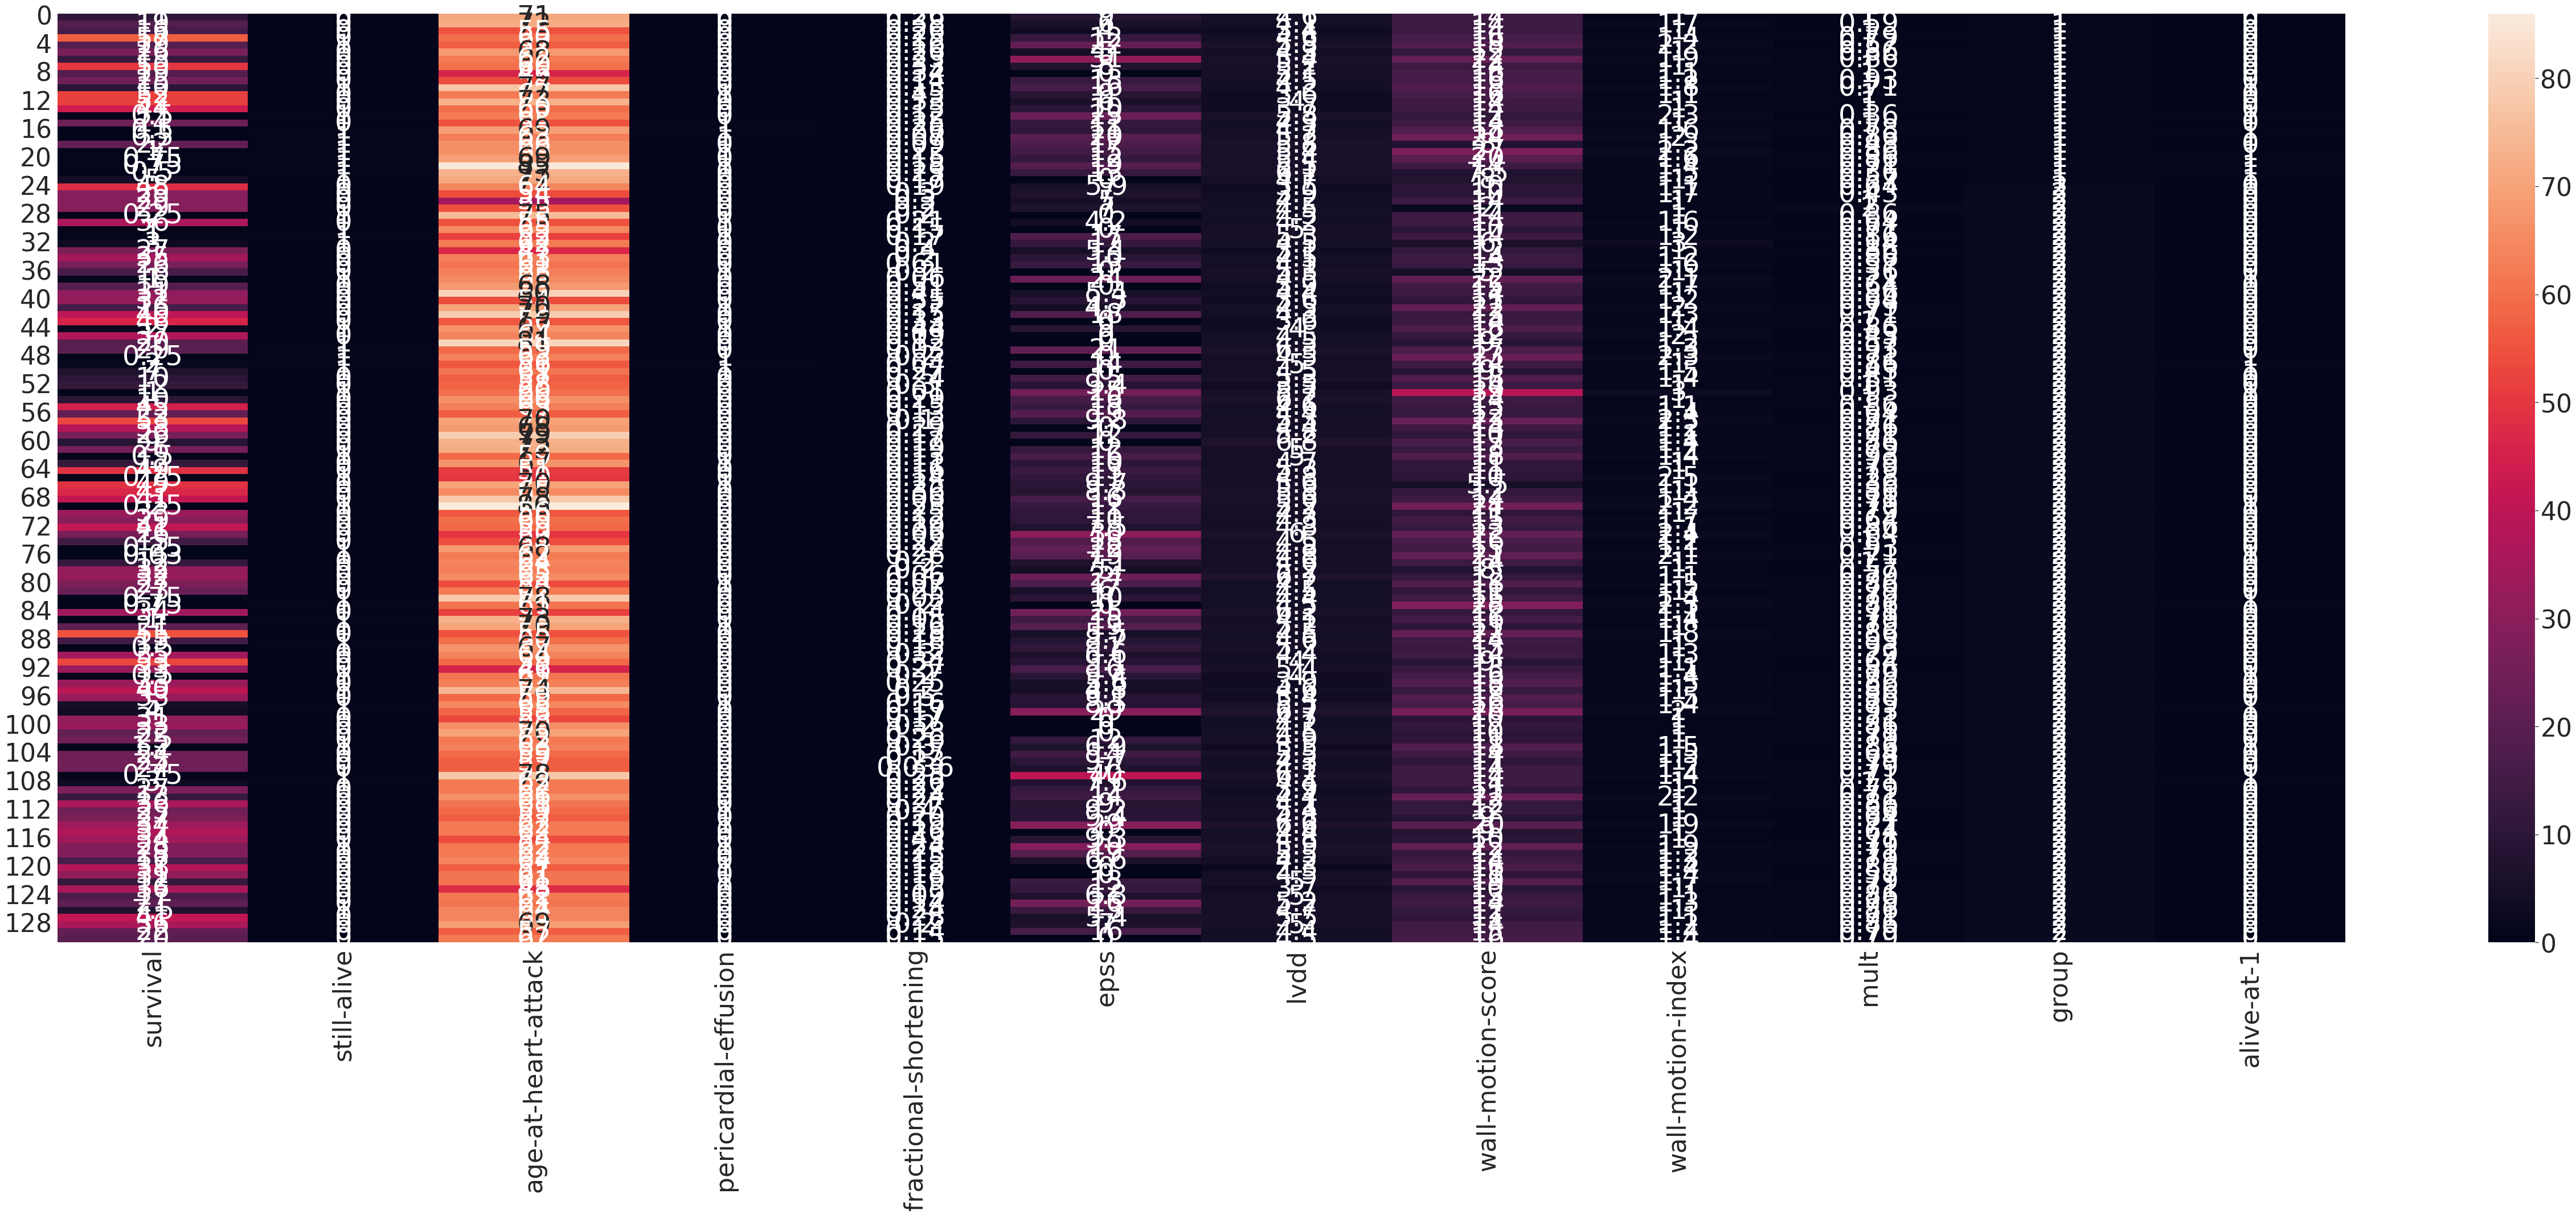

In [ ]:
# heat map for correlation
sns.set(rc = {'figure.figsize':(90,30)},font_scale = 4)
ax = sns.heatmap(df,annot=True)

### Step 2 : Standardization and Normalization

Scaling the features will still make the model much faster, so you might want to include this step when you’re preprocessing your data.

In [ ]:
# import standard scaler from sklearn
from sklearn.preprocessing import StandardScaler
# create an object that will scale and call the standard scaller
sc = StandardScaler()
#  directly fit and transform our dataset
df_scaled = pd.DataFrame(sc.fit_transform(df),columns = df.columns)
df_scaled

survival  still-alive  age-at-heart-attack  pericardial-effusion  \
0   -0.695126    -0.699025             1.008222             -0.473602   
1   -0.190379    -0.699025             1.130917             -0.473602   
2   -0.379659    -0.699025            -0.954890             -0.473602   
3    2.207173    -0.699025            -0.341418             -0.473602   
4   -0.190379     1.430563            -0.709501             -0.473602   
..        ...          ...                  ...                   ...   
126 -0.915953     1.430563             0.149360             -0.473602   
127  1.197678    -0.699025             0.149360             -0.473602   
128  0.882210    -0.699025             0.762833             -0.473602   
129 -0.001098    -0.699025            -0.709501             -0.473602   
130 -0.127285    -0.699025            -0.096029             -0.473602   

     fractional-shortening      epss      lvdd  wall-motion-score  \
0                 0.423615 -0.236392 -0.181721          -0.086627   
1                 1.574736 -0.616706 -0.823655          -0.086627   
2                 0.423615 -0.870248 -1.696684          -0.086627   
3                 0.356467  0.151781 -0.177870           0.318085   
4                -0.535652  1.411632  1.294726           0.722797   
..                     ...       ...       ...                ...   
126               0.231762  0.258015 -0.027657          -0.491339   
127               0.615469 -0.692768  0.935243          -0.693695   
128              -0.151945 -0.489935  0.396019           0.014551   
129              -0.727505  0.663683 -0.489849           0.115729   
130              -0.631579 -1.377333 -0.297269           0.216907   

     wall-motion-index      mult     group  alive-at-1  
0            -0.834343  1.127607 -2.111477   -0.473602  
1             0.722622 -0.970335 -2.111477   -0.473602  
2            -0.834343  1.127607 -2.111477   -0.473602  
3             0.166563  0.048083 -2.111477   -0.473602  
4             1.945951 -1.056901 -2.111477   -0.473602  
..                 ...       ...       ...         ...  
126          -0.834343  0.399438  0.473602   -0.473602  
127          -0.611919 -0.328732  0.473602   -0.473602  
128          -0.367253  0.399438  0.473602   -0.473602  
129          -0.033618  0.037899  0.473602   -0.473602  
130           0.075369  0.037899  0.473602   -0.473602  

[131 rows x 12 columns]

In [ ]:
# importing processing from sklearn.
from sklearn import preprocessing
df_norm = preprocessing.normalize(df,axis=0)
norm_df = pd.DataFrame(df_norm, columns=df.columns)
norm_df

survival  still-alive  age-at-heart-attack  pericardial-effusion  \
0    0.035426     0.000000             0.097984                   0.0   
1    0.061191     0.000000             0.099364                   0.0   
2    0.051529     0.000000             0.075903                   0.0   
3    0.183573     0.000000             0.082803                   0.0   
4    0.061191     0.152499             0.078663                   0.0   
..        ...          ...                  ...                   ...   
126  0.024154     0.152499             0.088323                   0.0   
127  0.132044     0.000000             0.088323                   0.0   
128  0.115941     0.000000             0.095224                   0.0   
129  0.070853     0.000000             0.078663                   0.0   
130  0.064412     0.000000             0.085563                   0.0   

     fractional-shortening      epss      lvdd  wall-motion-score  \
0                 0.094771  0.058567  0.083641           0.080204   
1                 0.138512  0.039044  0.074550           0.080204   
2                 0.094771  0.026030  0.062185           0.080204   
3                 0.092220  0.078492  0.083696           0.091662   
4                 0.058321  0.143163  0.104552           0.103119   
..                     ...       ...       ...                ...   
126               0.087481  0.083945  0.085823           0.068746   
127               0.102062  0.035140  0.099460           0.063017   
128               0.072901  0.045552  0.091824           0.083068   
129               0.051031  0.104769  0.079277           0.085933   
130               0.054676  0.000000  0.082005           0.088797   

     wall-motion-index      mult     group  alive-at-1  
0             0.060391  0.108813  0.047036         0.0  
1             0.102665  0.063982  0.047036         0.0  
2             0.060391  0.108813  0.047036         0.0  
3             0.087567  0.085744  0.047036         0.0  
4             0.135880  0.062132  0.047036         0.0  
..                 ...       ...       ...         ...  
126           0.060391  0.093252  0.094072         0.0  
127           0.066430  0.077692  0.094072         0.0  
128           0.073073  0.093252  0.094072         0.0  
129           0.082132  0.085527  0.094072         0.0  
130           0.085091  0.085527  0.094072         0.0  

[131 rows x 12 columns]

In [ ]:
# plots for the data distribution
# Create a blank figure with labels
from bokeh.models import HoverTool
p1 = figure(plot_width = 600, plot_height = 600, title = 'age at heart attack Distribution', x_axis_label = 'person', y_axis_label = 'Age at heart attack')

# Add glyph
p1.circle(df['age-at-heart-attack'].index.values,df['age-at-heart-attack'], size = 6, color = 'navy', alpha = 0.6)
p1.square(df_scaled['age-at-heart-attack'].index.values,df_scaled['age-at-heart-attack'], size = 6, color = 'yellow', alpha = 0.6)
p1.triangle(norm_df['age-at-heart-attack'].index.values,norm_df['age-at-heart-attack'], size = 6, color = 'red', alpha = 0.6)
p1.add_tools(HoverTool())
# p.circle(df_scaled['age-at-heart-attack'].index.values,df_scaled['age-at-heart-attack'], size = 12, color = 'yellow', alpha = 0.6)
# Set to output the plot in the notebook
output_notebook()
# Show the plot
show(p1)

In [ ]:
# distribution plots for all attributes
for cols in df.columns:
 p2 = figure(plot_width = 600, plot_height = 600, title = cols, x_axis_label = 'person', y_axis_label = cols)
 p2.circle(df[cols].index.values,df[cols], size = 6, color = 'navy', alpha = 0.6)
 p2.square(df_scaled[cols].index.values,df_scaled[cols], size = 6, color = 'yellow', alpha = 0.6)
 p2.triangle(norm_df[cols].index.values,norm_df[cols], size = 6, color = 'red', alpha = 0.6)
 p2.add_tools(HoverTool())
 output_notebook()
 # Show the plot
 show(p2)



# Discreetization, Sampling and Dimensionality reduction

## 1) Importing Dataset and understanding Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data2 = pd.read_csv('/content/drive/MyDrive/Datasets/credit card fraud dataset/creditcard.csv')
data2

In [ ]:
data2.shape

In [ ]:
data2.info()

In [ ]:
data2.describe()

In [ ]:
a = data2['Class'].unique()
a

In [ ]:
p3 = figure(plot_width = 1000, plot_height = 600, title = 'Class Distribution', x_axis_label = 'index', y_axis_label = 'Values')

p3.scatter(data2['V1'],data2['Amount'], color = 'navy', alpha = 0.6)


# Add glyph

p3.add_tools(HoverTool())
# p.circle(df_scaled['age-at-heart-attack'].index.values,df_scaled['age-at-heart-attack'], size = 12, color = 'yellow', alpha = 0.6)
# Set to output the plot in the notebook
output_notebook()
# Show the plot
show(p3)

## 2) Handling Imbalanced data

### step 1: count unique "class" values and check proportion

In [ ]:
# counting Class values
target_count = data2['Class'].value_counts()

# plot "Class" counts
p4 = figure(plot_width = 1000, plot_height = 600, title = 'Class  Values Count', x_axis_label = 'class', y_axis_label = 'count')
p4 = figure(width=400, height=400)
p4.vbar(x=target_count.index.values, width=0.5, bottom=0, top= target_count, color="firebrick")
show(p4)


In [ ]:
# Propotion check for the 2 output classes
proportion =  round(target_count[0] / target_count[1],2)
print(proportion,':1')

577.88 :1


Inference : Data is very dispropotionate, using simpler models will give class O as the model value

### step 2 : split data into train and test data using sklearn

In [ ]:
#splitting dataset
from sklearn.model_selection import train_test_split

X = data2.drop(['Class'],axis =1)
y = data2['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### XGB Classifier to check accuracy on data

 XGB Classifier provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
#using simpler model :XBGClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Training Accuracy: %.2f%%" % (accuracy * 100.0))

# now testing accuracy with 1 feature 
model = XGBClassifier()
model.fit(X_train[['V2']], y_train)
y_pred = model.predict(X_test[['V2']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Training Accuracy: 99.95%
Accuracy: 99.85%


The accuracy dropped when we checked with a single variable, so we can say that  99.95% accuracy can be an illusion

### step 3 : Confusion Matrix for true positive and true negative check

Confusion Matrix shows the correct and incorrect predictions for each class

Confusion matrix:
 [[56874     1]
 [   85     2]]


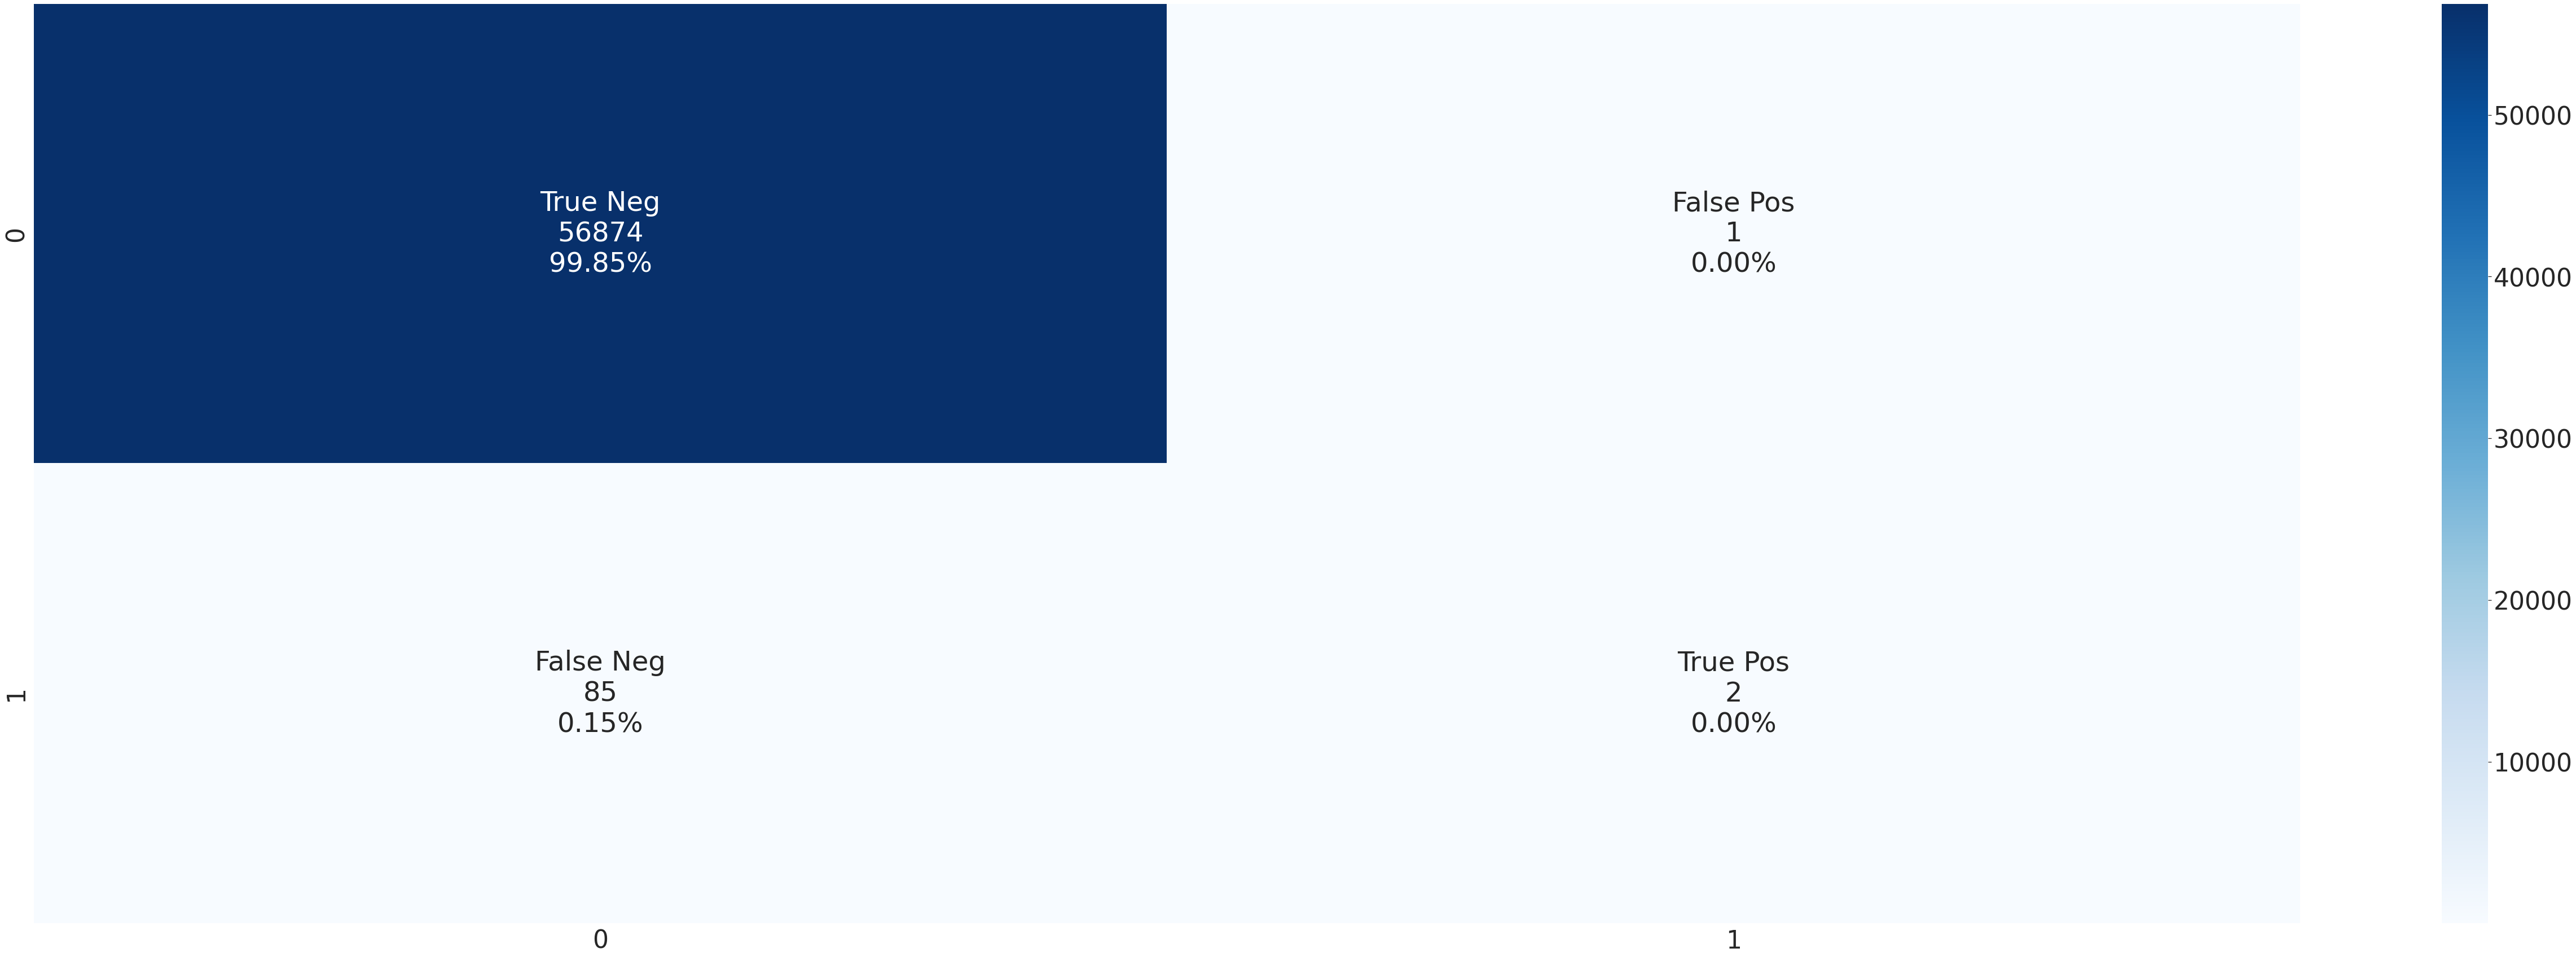

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Step 4 :  Resampling Techniques : under sampling and Over sampling

Resampling
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

In [ ]:
# splitting data into test and train data
train,test= train_test_split(data2, test_size=0.2)

# Class count
count_class_0, count_class_1 = train['Class'].value_counts()

# divide data based on class
data2_class_0 = train[train['Class'] == 0]
data2_class_1 = train[train['Class'] == 1]

#### a) Random Under Sampling

In [ ]:
# Random Under Sampling (Class 0 has more samples)
class_0_under = data2_class_0.sample(count_class_1)
df_test_under = pd.concat([class_0_under, data2_class_1], axis=0)
class_count = df_test_under.Class.value_counts()
print('Random under-sampling:')
print(df_test_under.Class.value_counts())



Random under-sampling:
0    390
1    390
Name: Class, dtype: int64


In [ ]:
p6 = figure(plot_width = 1000, plot_height = 600, title = 'Class  Values Count', x_axis_label = 'class', y_axis_label = 'count')
fill_color = ["navy","orange"]
p6 = figure(width=400, height=400)
p6.vbar(x=class_count.index.values, width=0.5, bottom=0, top= class_count, fill_color = fill_color)
show(p6)

#### b) Random Over Sampling

In [ ]:
# Random Under Sampling (Class 0 has more samples)
class_1_over = data2_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([data2_class_0,class_1_over], axis=0)
class_count2 = df_test_over.Class.value_counts()
print('Random over-sampling:')
print(df_test_over.Class.value_counts())

Random over-sampling:
0    227455
1    227455
Name: Class, dtype: int64


In [ ]:
p7 = figure(plot_width = 1000, plot_height = 600, title = 'Class  Values Count', x_axis_label = 'class', y_axis_label = 'count')
fill_color = ["navy","orange"]
p7 = figure(width=400, height=400)
p7.vbar(x=class_count2.index.values, width=0.5, bottom=0, top= class_count2, fill_color = fill_color)
show(p7)

#### c) Imbalanced Learn Module

2-dimensional plot function for seeing data distribution

In [ ]:
# Scatter Plot function to plot 2d spaces
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

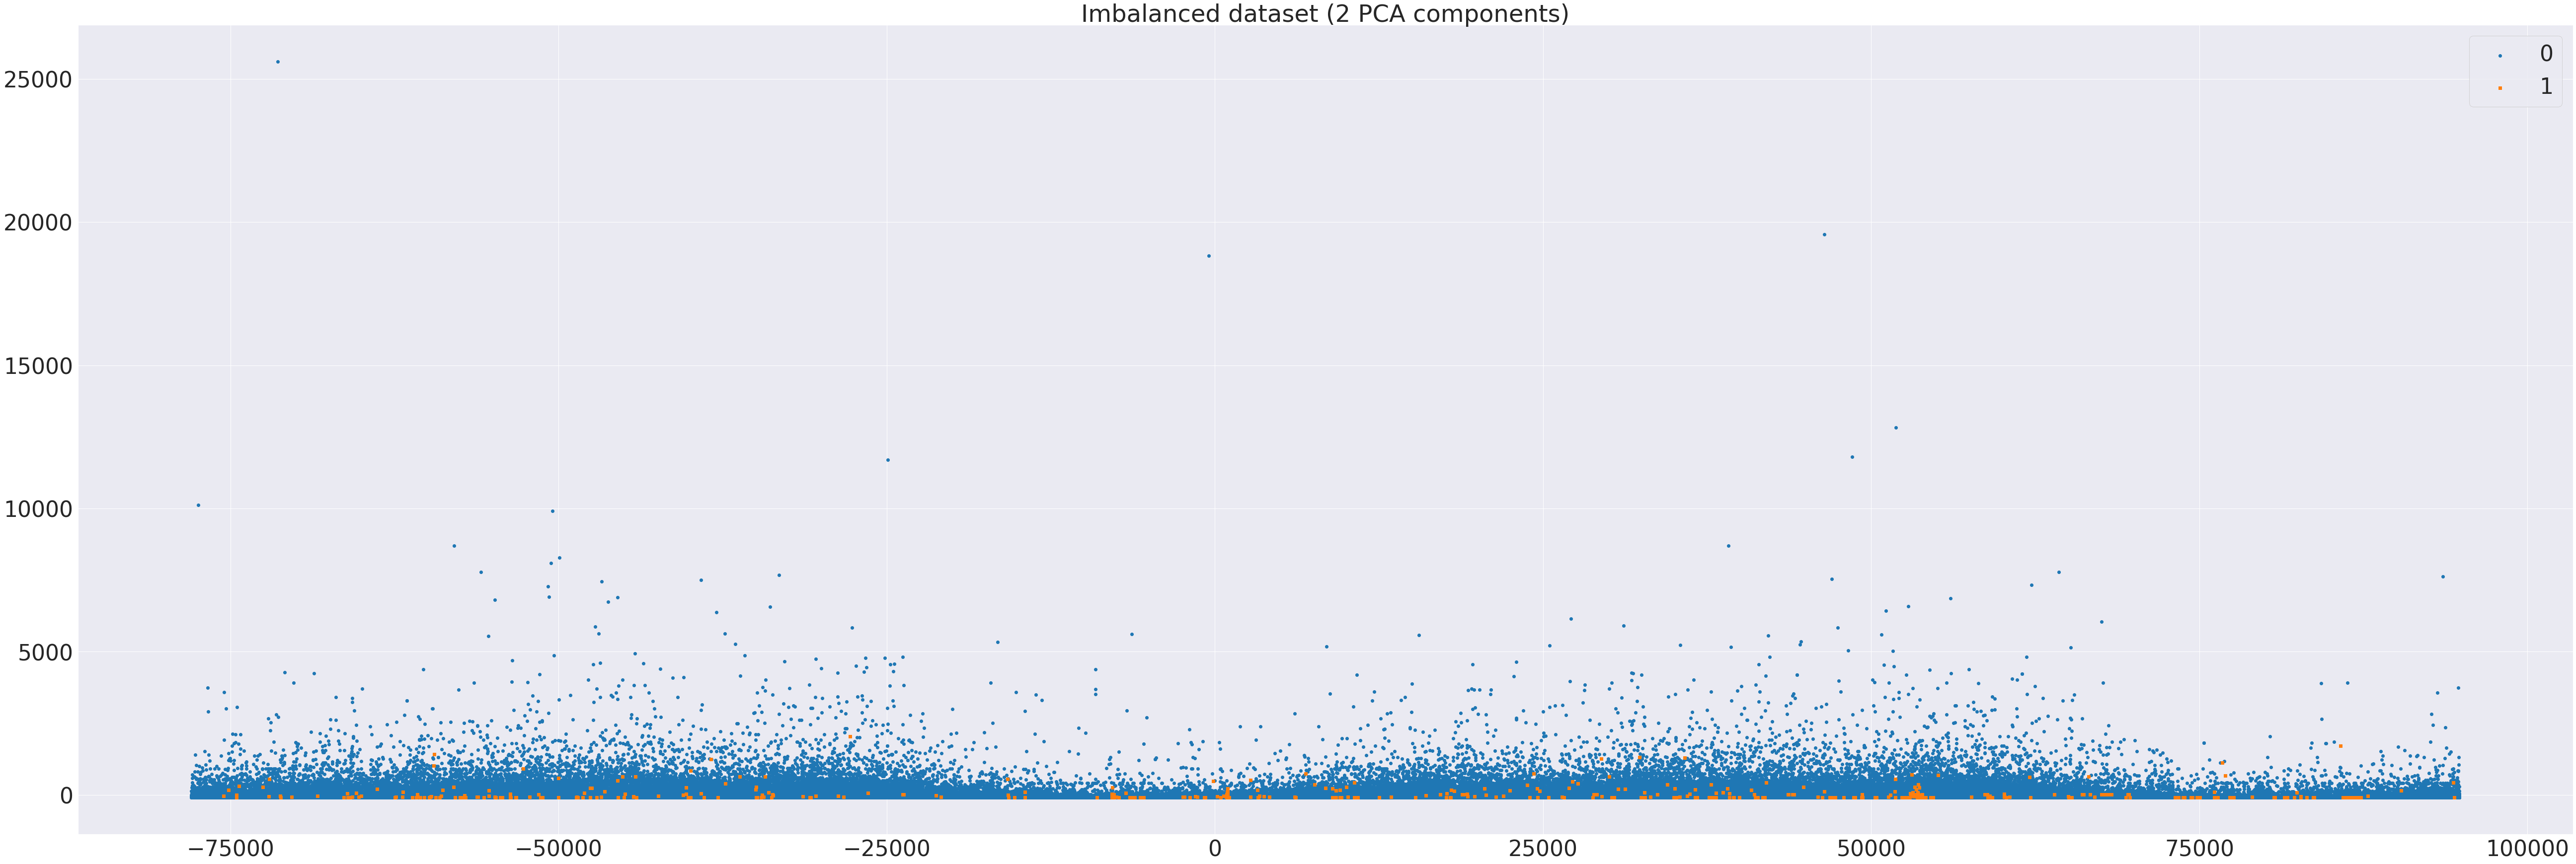

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [ ]:
#Under-sampling: Cluster Centroids
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state = 10)
X_cc, y_cc = cc.fit_resample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

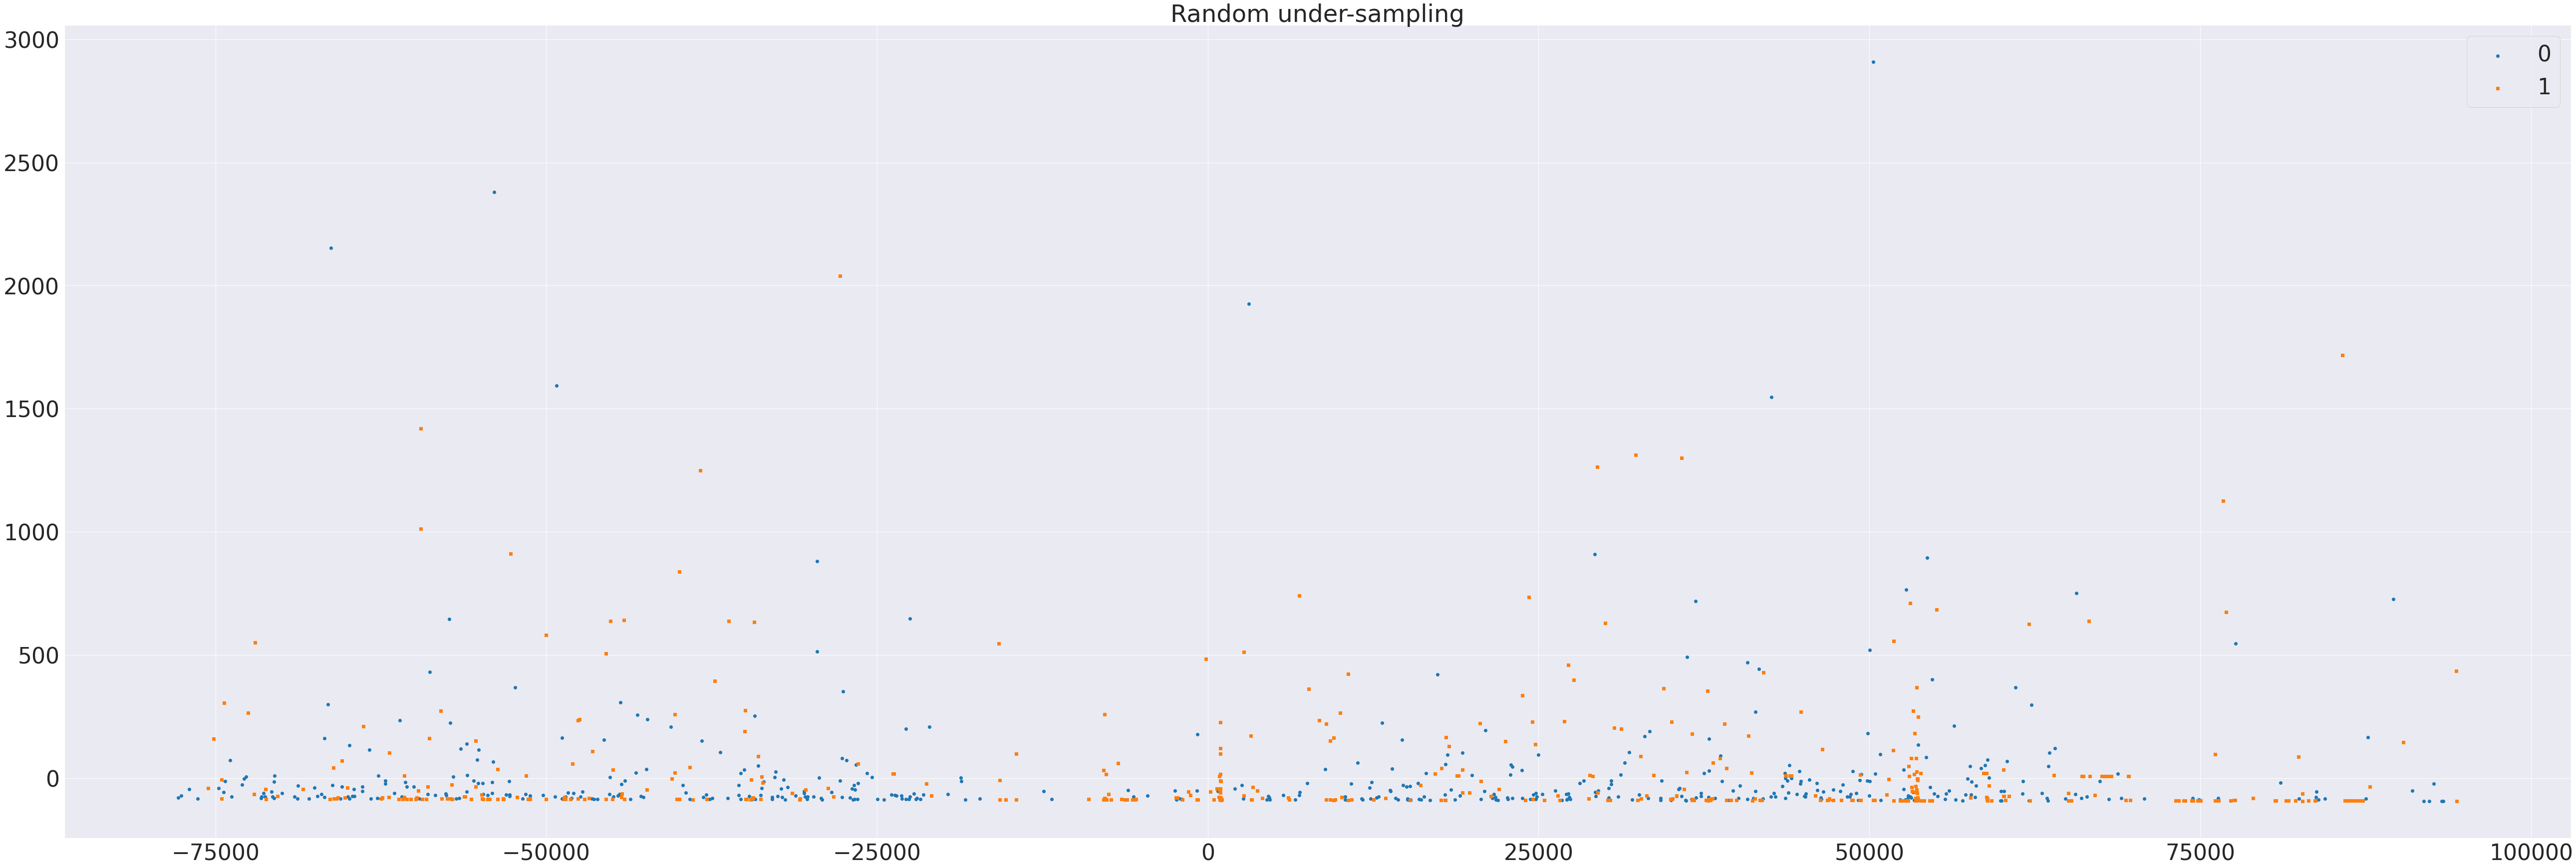

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority')
X_rus, y_rus = rus.fit_resample(X, y)

# print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

283823 new random picked points


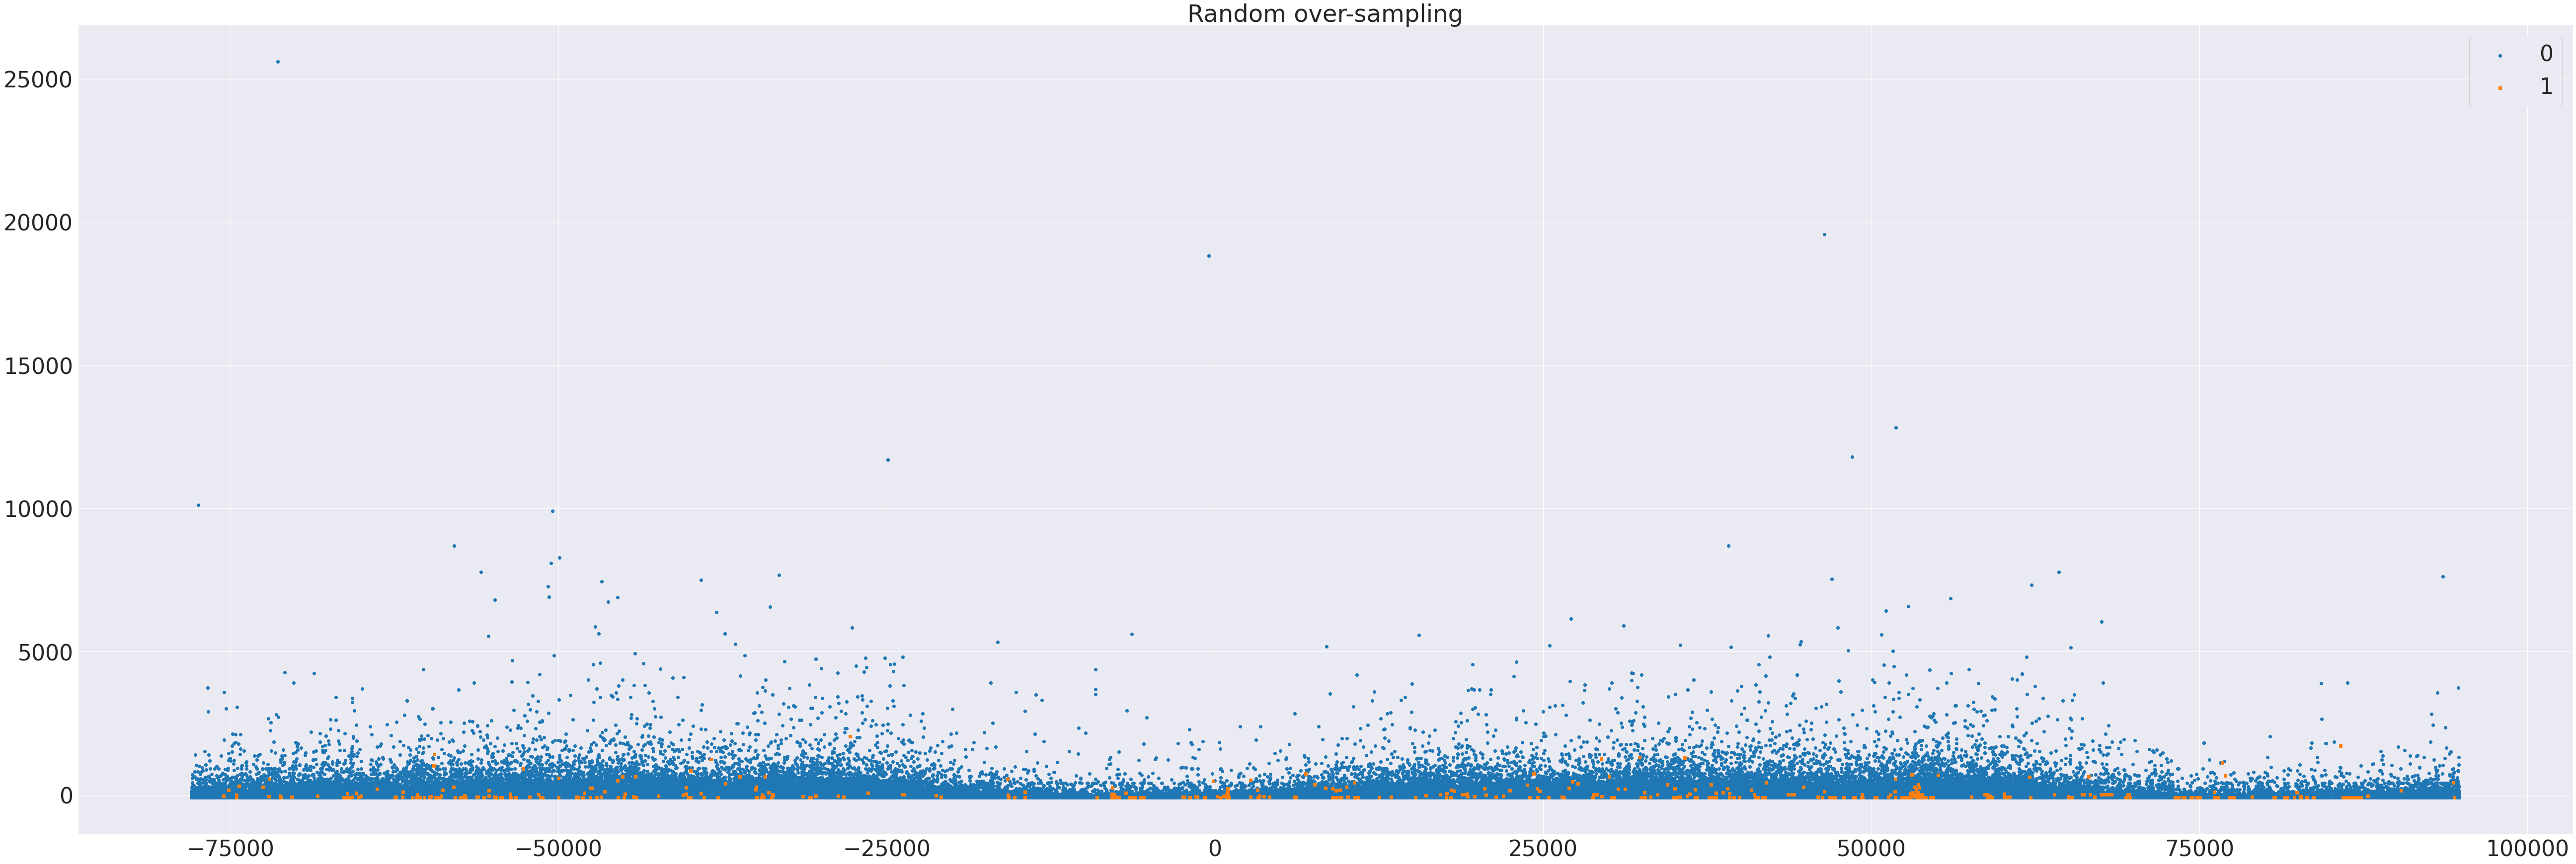

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

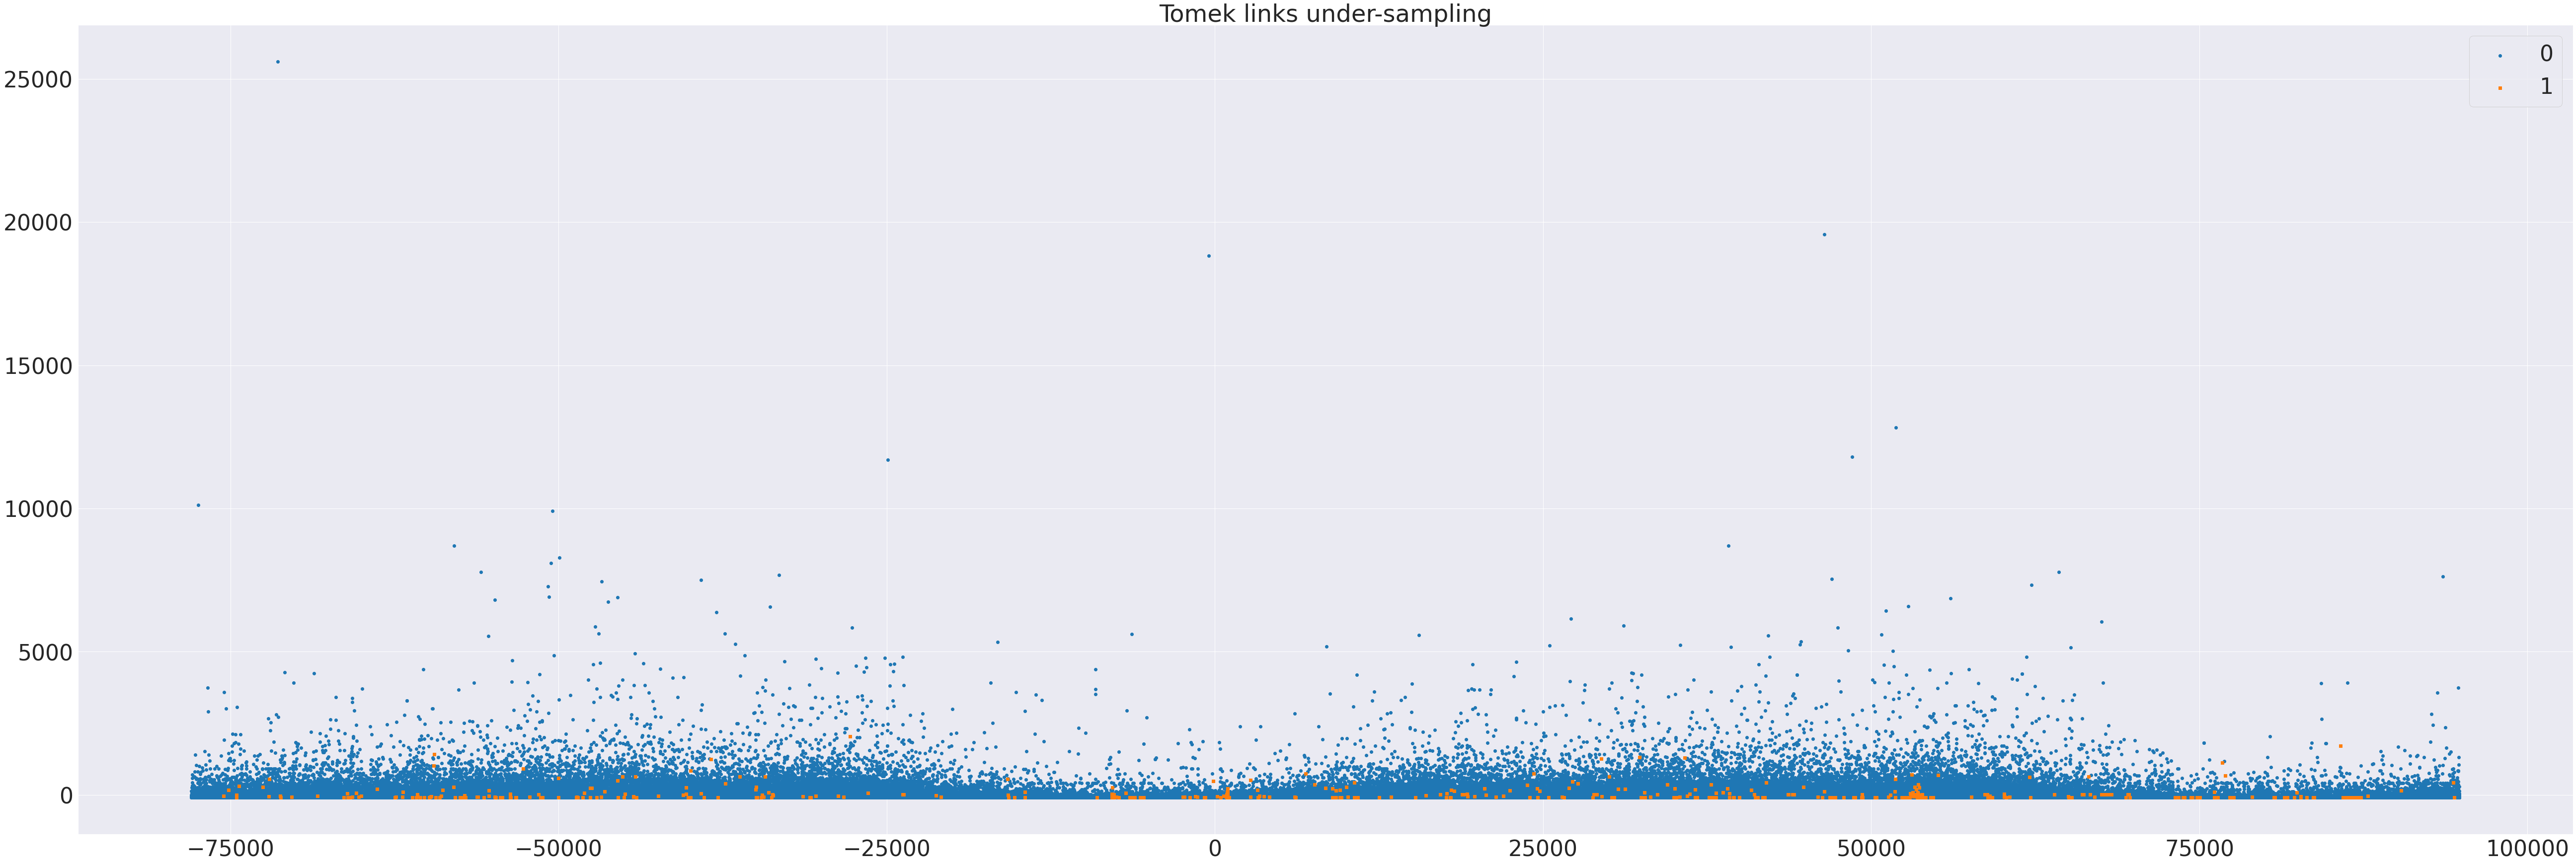

In [ ]:
#Under-sampling by removing Tomek’s links.
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

# print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')